# 期末作業

請至[KAGGLE](https://www.kaggle.com/)選擇一個次集資料進行資料分析，資料分析必須包括：
- 描述統計分析與資料類型
- 多元線性回歸模型（並附上統計摘要表）
- 變異數分析（並附上統計摘要表）
- 互動式儀表版(interactive dashboard)
- 趨勢分析圖(trend line)
- 集群熱力圖(cluster map)
- 圓餅圖(pie plot)
- 散布圖（scatter plot）
- 盒狀圖(box plot)
- 雙變量圖（joint plot）

[AI, ML, Data salaries](https://www.kaggle.com/datasets/nguyenthicamlai/ai-ml-data-salaries)

In [1]:
import pandas as pd
df = pd.read_csv('salaries.csv')

In [2]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,AWS Data Architect,258000,USD,258000,US,100,US,L
1,2023,SE,FT,Data Scientist,225000,USD,225000,US,0,US,M
2,2023,SE,FT,Data Scientist,156400,USD,156400,US,0,US,M
3,2023,SE,FT,Data Engineer,190000,USD,190000,US,100,US,M
4,2023,SE,FT,Data Engineer,150000,USD,150000,US,100,US,M
5,2023,SE,FT,Data Scientist,196000,USD,196000,US,0,US,M
6,2023,SE,FT,Data Scientist,121000,USD,121000,US,0,US,M
7,2023,SE,FT,Data Scientist,219000,USD,219000,US,0,US,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,US,0,US,M
9,2023,SE,FT,Data Engineer,230000,USD,230000,US,0,US,M


## 描述統計分析與資料類型

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4134 entries, 0 to 4133
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           4134 non-null   int64 
 1   experience_level    4134 non-null   object
 2   employment_type     4134 non-null   object
 3   job_title           4134 non-null   object
 4   salary              4134 non-null   int64 
 5   salary_currency     4134 non-null   object
 6   salary_in_usd       4134 non-null   int64 
 7   employee_residence  4134 non-null   object
 8   remote_ratio        4134 non-null   int64 
 9   company_location    4134 non-null   object
 10  company_size        4134 non-null   object
dtypes: int64(4), object(7)
memory usage: 355.4+ KB


In [4]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,4134.000000,4.134000e+03,4134.000000,4134.000000
mean,2022.428882,1.894287e+05,139416.264393,45.936139
std,0.684520,6.460075e+05,63605.472000,48.624255
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,96817.000000,0.000000
50%,2023.000000,1.400000e+05,136000.000000,0.000000
75%,2023.000000,1.833100e+05,179820.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [5]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

## 多元線性回歸模型（並附上統計摘要表）

In [6]:
import statsmodels.formula.api as sm
formula = 'salary_in_usd~experience_level+employment_type+job_title'
model3 = sm.ols(formula, data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     16.94
Date:                Mon, 29 May 2023   Prob (F-statistic):          7.42e-242
Time:                        14:56:05   Log-Likelihood:                -50839.
No. Observations:                4134   AIC:                         1.019e+05
Df Residuals:                    4029   BIC:                         1.026e+05
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                              1.823e+04   3.21e+04      0.568      0.570   -4.47e+04    8.12e+04
experience_level[T.EX]                                 1.079e+05   6233.336     17.314      0.000    9.57e+04     1.2e+05
experience_level[T.MI]                                 2.456e+04   3596.693      6.829      0.000    1.75e+04    3.16e+04
experience_level[T.SE]                                 6.787e+04   3316.460     20.465      0.000    6.14e+04    7.44e+04
employment_type[T.FL]                                 -8.044e+04   2.46e+04     -3.269      0.001   -1.29e+05   -3.22e+04
employment_type[T.FT]                                 -1.003e+04   1.72e+04     -0.582      0.561   -4.38e+04    2.38e+04
employment_type[T.PT]                                 -4.986e+04   2.18e+04     -2.287      0.022   -9.26e+04   -7116.500
job_title[T.AI Developer]                              8.693e+04    3.2e+04      2.719      0.007    2.43e+04     1.5e+05
job_title[T.AI Programmer]                              4.68e+04   4.67e+04      1.002      0.316   -4.48e+04    1.38e+05
job_title[T.AI Scientist]                              8.012e+04   2.99e+04      2.678      0.007    2.15e+04    1.39e+05
job_title[T.AWS Data Architect]                        2.252e+05   6.02e+04      3.742      0.000    1.07e+05    3.43e+05
job_title[T.Analytics Engineer]                        8.352e+04   2.75e+04      3.032      0.002    2.95e+04    1.38e+05
job_title[T.Applied Data Scientist]                    7.533e+04    3.2e+04      2.356      0.019    1.27e+04    1.38e+05
job_title[T.Applied Machine Learning Engineer]         7.127e+04   3.82e+04      1.867      0.062   -3569.660    1.46e+05
job_title[T.Applied Machine Learning Scientist]        7.139e+04   3.13e+04      2.282      0.023    1.01e+04    1.33e+05
job_title[T.Applied Scientist]                         1.174e+05   2.78e+04      4.225      0.000    6.29e+04    1.72e+05
job_title[T.Autonomous Vehicle Operations Lead]       -1.776e+04   6.02e+04     -0.295      0.768   -1.36e+05       1e+05
job_title[T.Autonomous Vehicle Technician]             5.641e+04   4.16e+04      1.356      0.175   -2.52e+04    1.38e+05
job_title[T.Azure Data Engineer]                       2.393e+04   6.02e+04      0.398      0.691   -9.41e+04    1.42e+05
job_title[T.BI Analyst]                                5.795e+04   3.23e+04      1.791      0.073   -5474.718    1.21e+05
job_title[T.BI Data Analyst]                           3.089e+04   3.01e+04      1.028      0.304    -2.8e+04    8.98e+04
job_title[T.BI Data Engineer]                           5.18e+04   6.02e+04      0.860      0.390   -6.62e+04     1.7e+05
job_title[T.BI Developer]        

In [11]:
import statsmodels.api as sm

# 多元線性回歸（以所有變數為自變數，MEDV 為應變數）
X = df[['experience_level', 'employment_type', 'job_title']]
y = df['salary_in_usd']

# 使用 One-Hot Encoding 將 Director 和 Cast 變數進行轉換
X_encoded = pd.get_dummies(df[['experience_level', 'employment_type', 'job_title']])

model = sm.OLS(y, X_encoded).fit()  # 建立多元線性回歸模型
print(model.summary())  # 輸出迴歸結果

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     16.94
Date:                Mon, 29 May 2023   Prob (F-statistic):          8.28e-242
Time:                        15:02:24   Log-Likelihood:                -50840.
No. Observations:                4134   AIC:                         1.019e+05
Df Residuals:                    4029   BIC:                         1.026e+05
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

## 變異數分析（並附上統計摘要表）

In [12]:
import pingouin as pg
from pingouin import pairwise_ttests
import researchpy as rp
import pandas as pd

print(df.columns)
print(df.info())

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4134 entries, 0 to 4133
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           4134 non-null   float64
 1   experience_level    4134 non-null   object 
 2   employment_type     4134 non-null   object 
 3   job_title           4134 non-null   object 
 4   salary              4134 non-null   int64  
 5   salary_currency     4134 non-null   object 
 6   salary_in_usd       4134 non-null   int64  
 7   employee_residence  4134 non-null   object 
 8   remote_ratio        4134 non-null   int64  
 9   company_location    4134 non-null   object 
 10  company_size        4134 non-null   object 
dtypes: float64(1), int64(3

In [13]:
rp.summary_cont(df['salary'].groupby(df['company_size'])).round(3)

,N,Mean,SD,SE,95% Conf.,Interval
company_size,,,,,,
L,481,438481.382,1745644.800,79594.552,282084.576,594878.189
M,3501,151467.839,152582.011,2578.738,146411.856,156523.822
S,152,275656.941,978646.523,79378.715,118820.561,432493.320


In [14]:
import scipy.stats as stats
stats.levene(df['salary'][df['company_size'] == 'L'],    
             df['salary'][df['company_size'] == 'M'],
             df['salary'][df['company_size'] == 'S'],
            center = 'mean')

LeveneResult(statistic=155.70238097949326, pvalue=6.408641425578281e-66)

In [15]:
aov = pg.anova(dv = 'salary', between = 'company_size', data = df, detailed = True).round(3)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,company_size,3.601030e+13,2,1.800515e+13,44.043,0.0,0.021
1,Within,1.688797e+15,4131,4.088107e+11,NaN,NaN,NaN


In [16]:
G = df['company_size'].unique()
args = []
for i in list(G):
    args.append(df[df['company_size'] == i]['salary'])

In [17]:
from scipy import stats
stats.levene(*args)

LeveneResult(statistic=52.79404410366664, pvalue=2.290655915285311e-23)

In [18]:
from scipy import stats
stats.f_oneway(*args)

F_onewayResult(statistic=44.042763618664075, pvalue=1.1845301077165159e-19)

In [19]:
import pingouin as pg
pg.pairwise_ttests(dv='salary', between='company_size', padjust = 'bonf', data=df).round(3)

C:\ProgramData\Anaconda3\lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,company_size,L,M,False,True,3.604,481.008,two-sided,0.000,0.001,bonf,33.783,0.461
1,company_size,L,S,False,True,1.448,460.762,two-sided,0.148,0.444,bonf,0.285,0.102
2,company_size,M,S,False,True,-1.564,151.319,two-sided,0.120,0.360,bonf,0.304,-0.499


## 互動式儀表版(interactive dashboard)

In [20]:
#### 互動式儀表板
!pip3 install ipywidgets

In [21]:
import pandas as pd
df = pd.read_csv('salaries.csv')

In [47]:
#Creating the interactive dashboard
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact
@interact
def create_fare_plot(col = df.drop(['salary'], axis
=1).columns) :
    sns.barplot(data = df, x = col, y ='salary')
    import matplotlib.pyplot as plt
    plt.title(f'Mean Bar Plot of the Fare grouped by the fcol]')

interactive(children=(Dropdown(description='col', options=('work_year', 'experience_level', 'employment_type',…

## 趨勢分析圖(trend line)

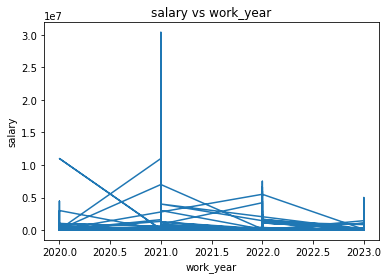

In [27]:
import matplotlib.pyplot as plt

# 趨勢分析圖
plt.plot(df['work_year'], df['salary'])
plt.xlabel('work_year')
plt.ylabel('salary')
plt.title('salary vs work_year')
plt.show()

## 集群熱力圖(cluster map)

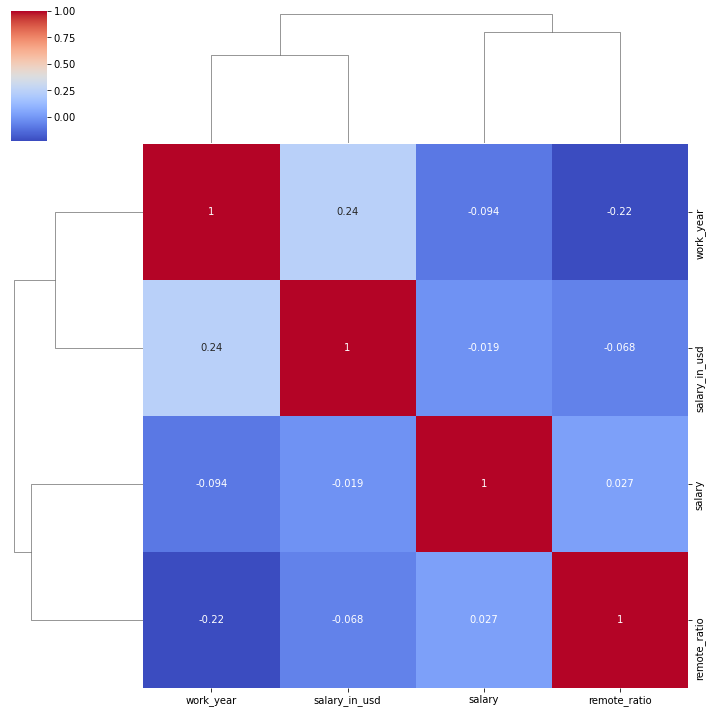

In [28]:
import seaborn as sns

# 集群熱力圖
correlation = df.corr()
sns.clustermap(correlation, annot=True, cmap='coolwarm')
plt.show()

## 圓餅圖(pie plot)

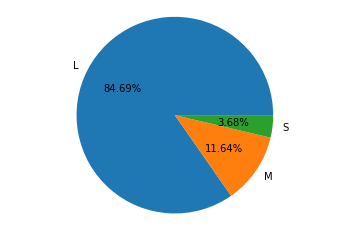

In [29]:
# 設定類別軸標籤，autopct 設到小數第一位，'equal'讓圓餅圖比例一致
size = df['company_size'].value_counts() # value_counts()計算個數並指派為變數size
labels = ['L', 'M', 'S'] # 設定圓餅圖類別標籤labels
plt.pie(size, labels = labels, autopct = '%.2f%%') # 圓餅圖函式plt.pie() 
# 2f後面出現兩個 %% 代表圓餅圖以百分比方式呈現
# 只有一個 % 就不會是百分比方式
plt.axis('equal')
plt.show()

## 散布圖（scatter plot）

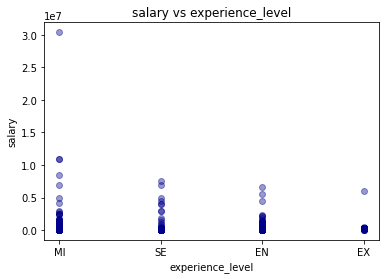

In [34]:
plt.scatter(df['experience_level'], df['salary'], c='darkblue', alpha=.4)
# plt.scatter(變數1, 變數2, color='顏色', alpha=.5)
plt.xlabel('experience_level')
plt.ylabel('salary')
plt.title('salary vs experience_level')
plt.show()
# Pandas散布圖： 變數.plot.scatter(x= '變數1', y= '變數2')

## 盒狀圖(box plot)

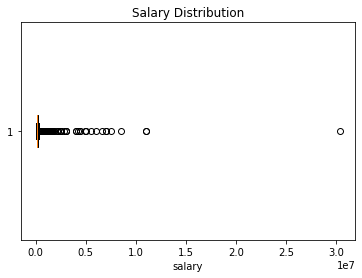

In [35]:
# 盒狀圖
plt.boxplot(df['salary'], vert=False)
plt.xlabel('salary')
plt.title('Salary Distribution')
plt.show()

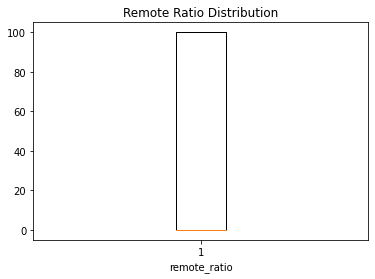

In [43]:
import matplotlib.pyplot as plt

# 繪製盒鬚圖
plt.boxplot(df['remote_ratio'])
plt.xlabel('remote_ratio')
plt.title('Remote Ratio Distribution')
plt.show()

## 雙變量圖（joint plot）

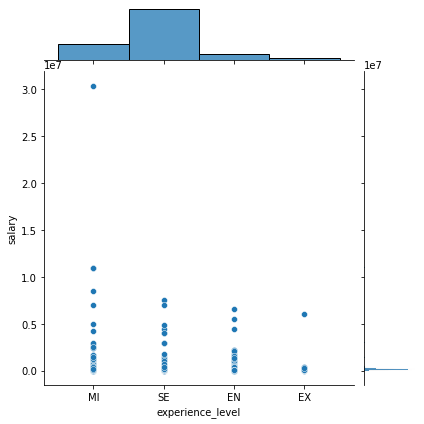

In [38]:
import seaborn as sns

# 雙變量圖
sns.jointplot(x='experience_level', y='salary', data=df, kind='scatter')
plt.show()